In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import string
import nltk
from collections import Counter, OrderedDict
from text_matcher import matcher

In [3]:
def clean(sentence):
    
    sentence = sentence.lower()
    
    sentence = re.sub('-  ','',sentence)
    sentence = re.sub('é','e',sentence)
    sentence = re.sub('v','u',sentence)
    sentence = re.sub('j','i',sentence)
    sentence = re.sub(r' +',' ',sentence)
    
    #sentence = re.sub('?','.',sentence)
    
    return sentence

In [4]:
def clean_text(text):
    
    text2 = re.sub('!','.',text)
    text2 = re.sub(' \...',' ',text)
    text2 = re.sub('  ',' ',text2)
    char  = [';',':','!','«','»',',','“','”','(',')']
    pattern = '[' + ''.join(char) + ']'
    new_str = re.sub(pattern,'', text2)
    #clean_words = [word for word in new_str.split() if word.lower() not in stopwords_latin]
    #new_str = ' '.join(clean_words)
    new_str = re.sub(r'\? [A-Z]','.',new_str)
    new_str = re.sub(r'\?','',new_str)
    pattern = r"\. ([a-z])"
    new_str = re.sub(pattern, r" \1", new_str)
    string = re.sub('v','u',new_str)
    string = re.sub('j','i',string)

    string = re.sub(r' +',' ',string)
    string = string.lower()
    
    return string

In [5]:
def len_split(sentence):
    return len(sentence.split())

In [6]:
os.chdir('/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/')

In [7]:
df = pd.read_excel('Thomas_de_capoue.xlsx')
df = df[['ID','Numéro','Text']]
df['clean'] = df['Text'].apply(clean)
df['len'] = df['clean'].apply(len_split)

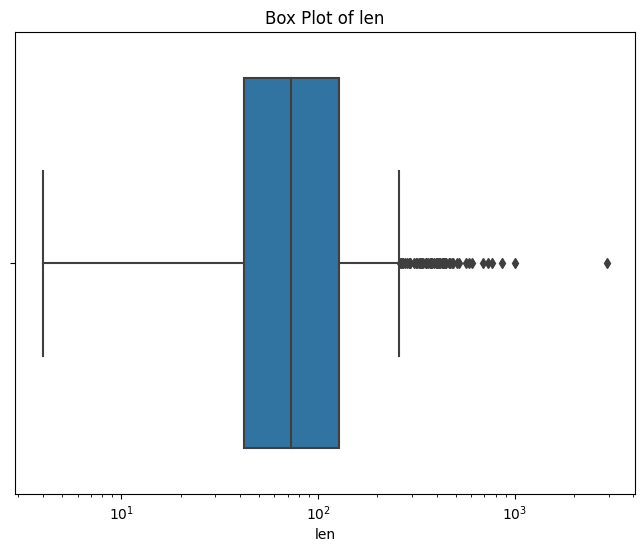

In [8]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['len'], orient='h')
plt.xscale('log')
plt.title(f'Box Plot of len')
plt.xlabel('len')
plt.show()

In [9]:
x = df['clean'].tolist()[1:]

In [9]:
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

fatal: HEAD n'est pas un nom d'objet valide
100%|█████████████████████████████████████████| 623/623 [03:46<00:00,  2.75it/s]


In [10]:
test = df['clean'][0].split('.')

In [9]:
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemma = []
for i in tqdm(range(len(test))):
    
    try:
        sentences: List[str] = [test[i]]
        # Get the main object from the model (: data iterator + postprocesor
        from pie_extended.models.lasla.imports import get_iterator_and_processor
        for sentence_group in sentences:
            iterator, processor = get_iterator_and_processor()
            dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
            lemma.append(dic)
    except Exception as e:
        print("An unexpected error occurred:", e)

fatal: HEAD n'est pas un nom d'objet valide


NameError: name 'test' is not defined

In [10]:
flattened_list = [item for sublist in lemma for item in sublist]
liste = [flattened_list] + lemmas

NameError: name 'lemmas' is not defined

In [10]:
def remove_punctuation(input_string):
    # Create a translation table to map punctuation characters to None (to remove them)
    translator = str.maketrans('', '', string.punctuation)
    # Use the translate method to remove the punctuation characters
    cleaned_string = input_string.translate(translator)
    return cleaned_string

In [11]:
def lower_split(sentence):
    
    sentence = sentence.lower().split()
    sentence_len = [len(i) for i in sentence]
    
    
    return sentence_len

In [12]:
df['mendenhall'] = df['clean'].apply(remove_punctuation).apply(lower_split)
liste = df['mendenhall'].tolist()
plate = [item for sublist in liste for item in sublist]

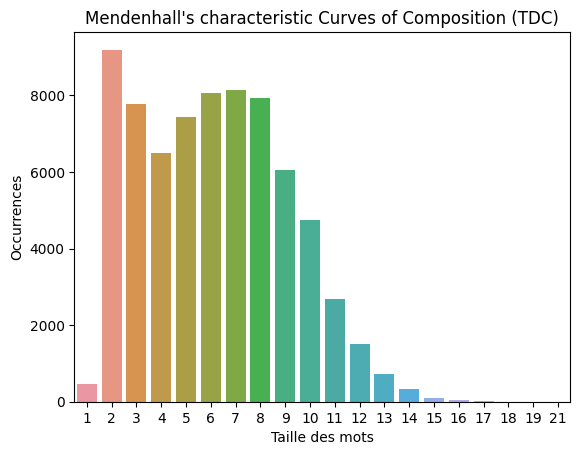

In [13]:
values = OrderedDict(Counter(plate))
values = dict(values.items())
ordered_dict = dict(sorted(values.items()))
    
df_len = pd.DataFrame(ordered_dict.items(), columns=['Taille des mots', 'Occurrences'])
sns.barplot(x=df_len['Taille des mots'], y=df_len['Occurrences'], data=df_len)
plt.title("Mendenhall's characteristic Curves of Composition (TDC)")

plt.savefig('mendenhall_curve_pdv.png',dpi=300)

plt.show()

In [15]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'
df_pdv = pd.read_excel(file)

In [16]:
df_pdv = df_pdv[['Date','Livre','Numéro de la charte','textes']]
df_pdv['clean'] = df_pdv['textes'].apply(clean_text)
df_pdv['len'] = df_pdv['clean'].apply(len_split)
df_pdv['mendenhall'] = df_pdv['clean'].apply(remove_punctuation).apply(lower_split)

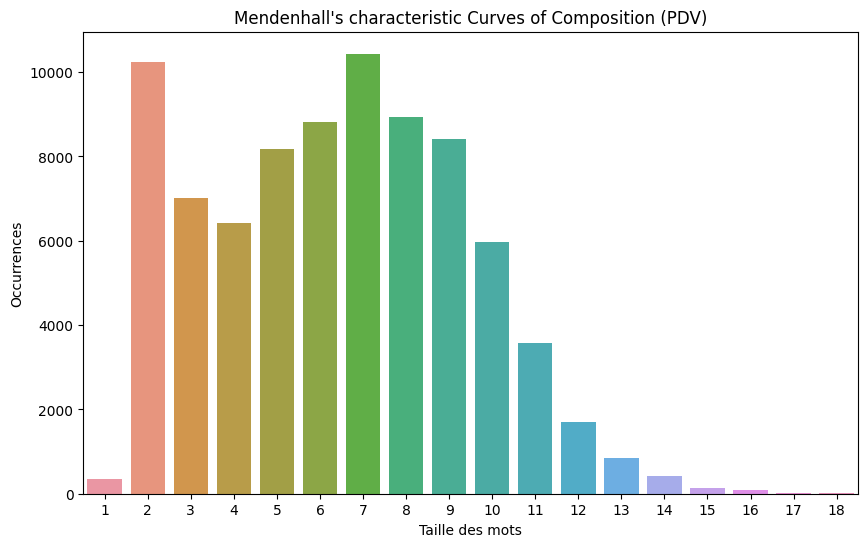

In [19]:
plt.figure(figsize=(10, 6))

liste2 = df_pdv['mendenhall'].tolist()
plate2 = [item for sublist in liste2 for item in sublist]
values2 = OrderedDict(Counter(plate2))
values2 = dict(values2.items())
ordered_dict2 = dict(sorted(values2.items()))
    
df_len2 = pd.DataFrame(ordered_dict2.items(), columns=['Taille des mots', 'Occurrences'])
sns.barplot(x=df_len2['Taille des mots'], y=df_len2['Occurrences'], data=df_len2)
plt.title("Mendenhall's characteristic Curves of Composition (PDV)")

plt.savefig("Mendenhalls_characteristic_Curves_of_Composition_(PDV).png",dpi = 300)

plt.show()

In [15]:
liste_textes_pdv = df_pdv['clean'].tolist()

In [ ]:
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


sentences: List[str] = [liste_textes_pdv[2]]
# Get the main object from the model (: data iterator + postprocesor
from pie_extended.models.lasla.imports import get_iterator_and_processor
for sentence_group in tqdm(sentences):
    iterator, processor = get_iterator_and_processor()
    dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
    


  0%|                                                     | 0/1 [00:00<?, ?it/s]